 TP  4 : Les villes de France (suite)
 =====

1 - Introduction 
------


L'objectif de ce TP est d'approfondir et d'améliorer le TP3. Si vous ne l'avez pas fait, finissez d'abord le TP 3 avant de faire ce TP, vous pourrez alors reprendre une grande partie du code pour débuter ce TP.

Le TP sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésite pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.

- Python 3: https://docs.python.org/3/
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/
- Matplotilb: https://matplotlib.org/contents.html

**<span style="color:red"> À part si cela est précisé, vous ne devez pas utiliser directement de boucle (`for`,`while`) ou de branchement conditionnel (`if`) durant ce TP.</span>.**

In [1]:
import numpy as np
import scipy as sc
import scipy.misc
import matplotlib.pyplot as plt

2 - Calcul de distances euclidiennes
----
### 2.1 Approche avec la librairie scipy

Générez 20 points sur un cercle de rayon 1. Vous stockerez leurs coordonnées dans la matrice `p`.

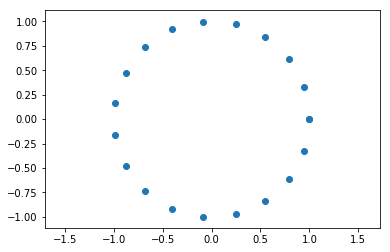

Calculez les distances euclidiennes entre ces 20 points. Vous mettrez le résultat dans une matrice 20x20 nommé `dist`. Pour faire cette question, vous utiliserez les fonctions `pdist` et `squareform` de la librairie *scipy*.

In [3]:
%%time


CPU times: user 439 µs, sys: 323 µs, total: 762 µs
Wall time: 301 µs


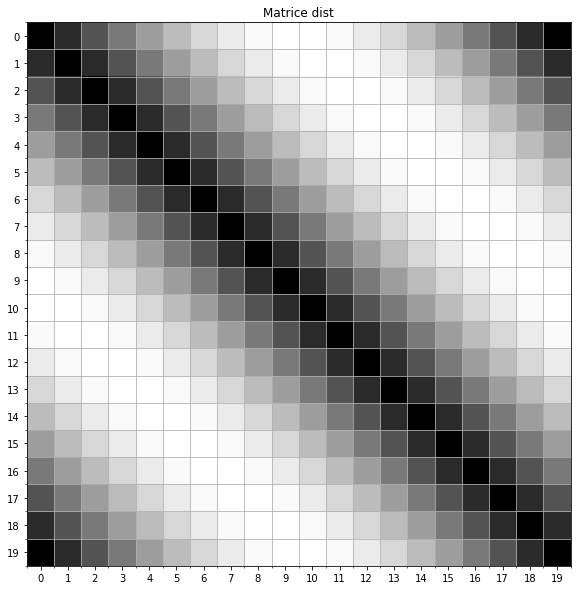

### 2.2 Approche avec la librairie numpy

Nous allons maintenant cherché à obtenir le même résultat que la partie précédente mais uniquement en utilisant des fonctions de la librairie `numpy`. La solution que l'on va mettre en place n'est pas l'unique solution possible avec cette librairie.

Créez deux versions de la matrice `p` de dimensions respectivement (1,20,2) et (20,1,2) que vous nommerez `p1` et `p2`.

Dimensions de p1: (1, 20, 2) Dimensions de p2: (20, 1, 2)


En utilisant les deux tableaux `p1` et `p2` et le mécanisme de broadcasting, calculez la soustraction de toutes les valeurs de `p` entre elles. Le résultat se nommera `s` et sera de taille (20,20,2).

Dimensions de s: (20, 20, 2)


Faites la somme des carrés des valeurs de `s` selon le dernier axe. Le résultat se nommera `dist2`.

Dimensions de dist2: (20, 20)


Faites la racine carrée de tout les valeurs de `dist2`.

Comparez les valeurs de `dist` (calculé précédemment avec `pdist` et `squareform`) et les valeurs de `dist2`.

dist == dist2 ? True


2 - Matrice des distances euclidiennes entre villes
------

Reprendre dans le code du TP3, la lecture du fichier *data.pickle* et la fonction `distGeo`.

In [13]:
import pickle

# pour lire les données sur disque avec pickle
...
    
R = 6367.445

def distGeo(u,v):
    ...

Calculez la distance entre *Caen* et *Rouen*.

Distance ente Caen et Rouen: 107.50560624861764


Nous allons à présent mettre en place une méthode plus rapide pour calculer la distance entre les différentes villes. Nous allons commencer par représenter les villes par leurs coordonnées 3D, et c'est à partir de ces coordonnées 3D que l'on pourra calculer les distances euclidiennes entre villes. La distance euclidienne est moins précise que la distance géodésique car elle ne prend pas en compte la courbure de la terre mais son calcul est plus rapide. 

Pour calculer les coordonnées 3D, vous pourrez utiliser les équations suivantes :

\begin{eqnarray*}
	x & = & R \ \cos(p_{lat}) \sin(p_{lon})\\
	y & = & R \ \cos(p_{lat}) \cos(p_{lon})\\
	z & = & R \ \sin(p_{lat})\\
\end{eqnarray*}

Attention, les angles doivent être en radian et non en degré. 

Écrivez une fonction `convert3D` qui convertie un tableau de coordonnée de ville selon la latitude et la longitude en un tableau de coordonnée 3D. 

In [15]:
def convert3D(u):
    xyz = np.zeros((u.shape[0],3))
    xyz[:,0] = ?
    xyz[:,1] = ?
    xyz[:,2] = ?
    return xyz

En utilisant la fonction `plt.scatter` de *matplotlib*, affichez chaque ville de Normandie sous la forme de point de coordonnée (x,-y). On ignorera le 3ème axe qui correspond à la distance avec le centre de la terre.   

Vous pouvez afficher d'une couleur différente les villes de *Caen* et *Rouen*.

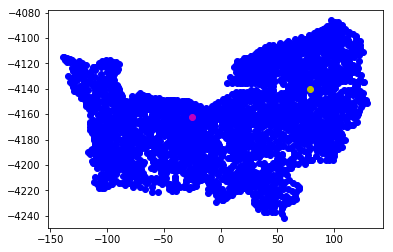

Créez une fonction `distEuc` qui calcul la distance euclidienne entre deux villes dont les coordonnées sont en latitude, longitude. Vous utiliserez la fonction `convert3D` pour faire cette fonction. 

In [17]:
def distEuc(u,v):
    ...

Calculez la distance entre *Caen* et *Rouen* en utilisant `distEuc`. Trouvez-vous le même résultat qu'avec une distance géodésique ? 

Distance ente Caen et Rouen: 107.50432936846148


3 - Villes les plus proches / Villes les plus loins
-----

Nous allons écrire un programme qui recherche les 10 villes les plus proches d'une ville donnée. 
Commencez par calculer la distance entre toutes les villes de Normandie. Pour cela nous allons utiliser les fonctions `pdist` et `squareform` comme au TP 4. Par contre, vous utiliserez l'argument `euclidean` pour la fonction `pdist`et non la fonction `distEuc` écrite plus haut. 
Attention les coordonnées doivent être sous la forme x,y,z et non latitude/longitude.

In [19]:
%%time


CPU times: user 135 ms, sys: 58.2 ms, total: 193 ms
Wall time: 124 ms


Récupérez la distance entre *Caen* et les autres villes de Normandie. 

[ 52.90934949  76.30728647 115.45986608 ...  92.5783011   59.51344251
  81.12100076]


En utilisant le dictionnaire `nom_ville` définit au TP 3 et la fonction `np.argsort`, donnez les noms des 10 villes les plus proches de Caen. 

Vous devriez trouver 'Hérouville-Saint-Clair', 'Louvigny', 'Mondeville', 
'Saint-Germain-la-Blanche-Herbe', 'Epron', 'Colombelles', 'Fleury-sur-Orne', 'Giberville', 'Bretteville-sur-Odon', 'Saint-Contest'.

Vous pouvez utiliser une boucle `for` pour mettre en forme l'affichage.

Affichage sans mise en forme:
[b'H\xe9rouville-Saint-Clair' b'Louvigny' b'Mondeville'
 b'Saint-Germain-la-Blanche-Herbe' b'Epron' b'Colombelles'
 b'Fleury-sur-Orne' b'Giberville' b'Bretteville-sur-Odon' b'Saint-Contest']

Affichage avec mise en forme: 
Hérouville-Saint-Clair est à une distance de 3.0482384742025412km de Caen.
Louvigny est à une distance de 3.0488186749732202km de Caen.
Mondeville est à une distance de 3.0488186749733335km de Caen.
Saint-Germain-la-Blanche-Herbe est à une distance de 3.632049018631149km de Caen.
Epron est à une distance de 3.8972002362645495km de Caen.
Colombelles est à une distance de 4.076539320949663km de Caen.
Fleury-sur-Orne est à une distance de 4.42598761958257km de Caen.
Giberville est à une distance de 4.842756118981385km de Caen.
Bretteville-sur-Odon est à une distance de 5.185615579430026km de Caen.
Saint-Contest est à une distance de 5.187122224035128km de Caen.


Vous ferez de même avec le calcul des 10 villes les plus éloignées de *Rouen*.

Affichage sans mise en forme:
[b'Auderville' b'Saint-Germain-des-Vaux' b'Jobourg' b'Omonville-la-Petite'
 b'Herqueville' b'Digulleville' b'Pontorson' b'Omonville-la-Rogue'
 b'Flamanville' b'Beaumont-Hague']

Affichage avec mise en forme: 
Auderville est à une distance de 219.43059279145356km de Rouen.
Saint-Germain-des-Vaux est à une distance de 218.6697424194937km de Rouen.
Jobourg est à une distance de 217.09524441794125km de Rouen.
Omonville-la-Petite est à une distance de 215.8462398065517km de Rouen.
Herqueville est à une distance de 215.44166228409756km de Rouen.
Digulleville est à une distance de 214.65685375889097km de Rouen.
Pontorson est à une distance de 213.47724621396222km de Rouen.
Omonville-la-Rogue est à une distance de 213.4675199468054km de Rouen.
Flamanville est à une distance de 213.2549050096577km de Rouen.
Beaumont-Hague est à une distance de 213.05678186548843km de Rouen.


**Question bonus**: Affichez les villes de Normandie et mettez des couleurs pour *Caen*, *Rouen*, les 10 villes les plus proches de *Caen* et les 10 villes les plus loin de *Rouen*.

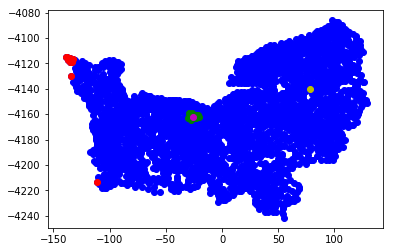

4 - Histogramme des distances des villes
----

Au moyen de la fonction `np.histogram`(voir le TP2) calculez et affichez l’histogramme des distances entre villes de Normandie.

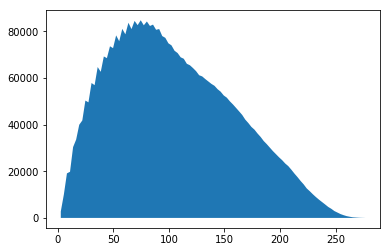